In [1]:
!pip install tensorflow pillow matplotlib  Image --quiet 


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [12]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("dogclassification.h5")

# Print the model summary to understand its architecture
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_282 (Conv2D) │ (None, 111, 111,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_282[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_282      │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_283 (Conv2D) │ (None, 109, 109,  │      9,216 │ activation_282[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_283[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_283      │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_284 (Conv2D) │ (None, 109, 109,  │     18,432 │ activation_283[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_284[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_284      │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 54, 54,    │          0 │ activation_284[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_285 (Conv2D) │ (None, 54, 54,    │      5,120 │ max_pooling2d_12… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_285[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_285      │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_286 (Conv2D) │ (None, 52, 52,    │    138,240 │ activation_285[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_286[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_286      │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 23,972,712 (91.45 MB)

 Trainable params: 2,169,926 (8.28 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 2 (12.00 B)

A. PROSES TRAINING

1. Jumlah data yg dipakai untuk program identifikasi ras anjing
Train (Data Latih) : 85%
Validation (Data Validasi) : 7.5%
Testing (Data Uji) : 7.5%

Data Training dan Testing BERBEDA!

In [2]:
import os

def count_images(directory):
    # Hitung jumlah file gambar dalam direktori dan subdirektorinya
    image_extensions = ('.jpg')  # Ekstensi gambar yang diperiksa
    count = 0
    for root, dirs, files in os.walk(directory):
        count += sum(1 for file in files if file.lower().endswith(image_extensions))
    return count

# Path direktori
train_dir = "D:/KULIAH/Semester 5/Pengenalan Pola/DogBreed_Website/train"
valid_dir = "D:/KULIAH/Semester 5/Pengenalan Pola/DogBreed_Website/valid"
test_dir = "D:/KULIAH/Semester 5/Pengenalan Pola/DogBreed_Website/test"

# Hitung jumlah gambar
train_count = count_images(train_dir)
valid_count = count_images(valid_dir)
test_count = count_images(test_dir)

# Hitung total gambar
total_images = train_count + valid_count + test_count

# Hitung persentase
train_percentage = (train_count / total_images) * 100
valid_percentage = (valid_count / total_images) * 100
test_percentage = (test_count / total_images) * 100

# Cetak hasil
print(f"Jumlah gambar di train: {train_count} ({train_percentage:.2f}%)")
print(f"Jumlah gambar di valid: {valid_count} ({valid_percentage:.2f}%)")
print(f"Jumlah gambar di test: {test_count} ({test_percentage:.2f}%)")
print(f"Total gambar dalam dataset: {total_images}")


Jumlah gambar di train: 7946 (85.02%)
Jumlah gambar di valid: 700 (7.49%)
Jumlah gambar di test: 700 (7.49%)
Total gambar dalam dataset: 9346


2.PROSES TRAINING 
(Data untuk training 85% dan data untuk validation 7.5%)
-Training adalah proses untuk melatih model menggunakan data pelatihan dan mengoptimalkan parameter model.
-Validation adalah proses untuk menguji seberapa baik model bekerja pada data yang tidak digunakan selama pelatihan, membantu menghindari overfitting dan memberikan gambaran tentang kemampuan model pada data baru.

Di akhir pelatihan, model akan disimpan dengan nama "dogclassification.h5" yang kemudian bisa digunakan untuk prediksi pada data baru.

In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

train_dir = "D:/KULIAH/Semester 5/Pengenalan Pola/DogBreed_Website/train"
test_dir = "D:/KULIAH/Semester 5/Pengenalan Pola/DogBreed_Website/valid"

num_classes = 70
image_size = (224, 224)  # Corrected variable name
batch_size = 32
learning_rate = 0.01
epochs = 10

training_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_data = ImageDataGenerator(rescale=1./255)

base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(image_size[0], image_size[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=["accuracy"])

train_generator = training_data.flow_from_directory(
    train_dir,
    target_size=image_size,  # Corrected variable name
    batch_size=batch_size,
    class_mode="categorical"
)

valid_generator = validation_data.flow_from_directory(
    test_dir,
    target_size=image_size,  # Corrected variable name
    batch_size=batch_size,
    class_mode="categorical"
)

# Calculate steps_per_epoch and validation_steps
steps_per_epoch = train_generator.samples // batch_size
validation_steps = valid_generator.samples // batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=validation_steps
)

model.save("dogclassification.h5")

Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5942 - loss: 6.1152

c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - accuracy: 0.5947 - loss: 6.0993 - val_accuracy: 0.7768 - val_loss: 1.3507
Epoch 2/10
  1/248 ━━━━━━━━━━━━━━━━━━━━ 3:48 927ms/step - accuracy: 0.8438 - loss: 0.5395

c:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8438 - loss: 0.5395 - val_accuracy: 0.7857 - val_loss: 2.8482
Epoch 3/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.8113 - loss: 0.7968 - val_accuracy: 0.9062 - val_loss: 0.7647
Epoch 4/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8750 - loss: 0.2733 - val_accuracy: 0.8214 - val_loss: 1.9447
Epoch 5/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.8401 - loss: 0.6165 - val_accuracy: 0.8914 - val_loss: 0.8176
Epoch 6/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9000 - loss: 0.4081 - val_accuracy: 0.9643 - val_loss: 0.1000
Epoch 7/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 414s 2s/step - accuracy: 0.8447 - loss: 0.6238 - val_accuracy: 0.8958 - val_loss: 1.0012
Epoch 8/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8750 - loss: 0.7457 - val_accuracy: 0.8571 - val_loss: 3.5572
Epoch 9/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 591s 2s/step - accuracy: 0.8555 - loss: 0.5876 - val_accuracy: 0.9077 

3. Proses ini adalah evaluasi model dan prediksi pada gambar uji, diikuti dengan penyimpanan hasil dalam format CSV untuk analisis lebih lanjut.

In [14]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image

model = load_model("dogclassification.h5")
# Directory containing test images with subdirectories for each class
test_dir = "D:/KULIAH/Semester 5/Pengenalan Pola/DogBreed_Website/valid"
predictions = []
true_labels = []
all_images = []
confidence_scores = []

# Define class names
class_names = {
        "0": "Afghan",
        "1": "African Wild Dog",
        "2": "Airedale",
        "3": "American Hairless",
        "4": "American  Spaniel",
        "5": "Basenji",
        "6": "Basset",
        "7": "Beagle",
        "8": "Bearded Collie",
        "9": "Bermaise",
        "10": "Bichon Frise",
        "11": "Blenheim",
        "12": "Bloodhound",
        "13": "Bluetick",
        "14": "Border Collie",
        "15": "Borzoi",
        "16": "Boston Terrier",
        "17": "Boxer",
        "18": "Bull Mastiff",
        "19": "Bull Terrier",
        "20": "Bulldog",
        "21": "Cairn",
        "22": "Chihuahua",
        "23": "Chinese Crested",
        "24": "Chow",
        "25": "Clumber",
        "26": "Cockapoo",
        "27": "Cocker",
        "28": "Collie",
        "29": "Corgi",
        "30": "Coyote",
        "31": "Dalmation",
        "32": "Dhole",
        "33": "Dingo",
        "34": "Doberman",
        "35": "Elk Hound",
        "36": "French Bulldog",
        "37": "German Sheperd",
        "38": "Golden Retriever",
        "39": "Great Dane",
        "40": "Great Perenees",
        "41": "Greyhound",
        "42": "Groenendael",
        "43": "Irish Spaniel",
        "44": "Irish Wolfhound",
        "45": "Japanese Spaniel",
        "46": "Komondor",
        "47": "Labradoodle",
        "48": "Labrador",
        "49": "Lhasa",
        "50": "Malinois",
        "51": "Maltese",
        "52": "Mex Hairless",
        "53": "Newfoundland",
        "54": "Pekinese",
        "55": "Pit Bull",
        "56": "Pomeranian",
        "57": "Poodle",
        "58": "Pug",
        "59": "Rhodesian",
        "60": "Rottweiler",
        "61": "Saint Bernard",
        "62": "Schnauzer",
        "63": "Scotch Terrier",
        "64": "Shar_Pei",
        "65": "Shiba Inu",
        "66": "Shih-Tzu",
        "67": "Siberian Husky",
        "68": "Vizsla",
        "69": "Yorkie"
}

# Loop through each class folder and generate predictions
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)
            pred = model.predict(img_array)
            
            # Get predicted label index and confidence score
            predicted_label_index = np.argmax(pred)
            confidence_score = pred[0][predicted_label_index] * 100  # Convert to percentage
            
            # Append results to lists
            predictions.append(predicted_label_index)
            confidence_scores.append(confidence_score)
            true_labels.append(list(class_names.values()).index(class_name))
            all_images.append(img_path)

# Convert predictions, true labels, and confidence scores to arrays
predictions = np.array(predictions)
true_labels = np.array(true_labels)
confidence_scores = np.array(confidence_scores)

# Prepare data for CSV
data = {
    "image_path": all_images,
    "true_label": [list(class_names.values())[i] for i in true_labels],
    "predicted_label": [list(class_names.values())[i] for i in predictions],
    "confidence_score (%)": confidence_scores,  # Confidence percentage
}

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
output_csv_path = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\predictions_with_confidence.csv"
df.to_csv(output_csv_path, index=False)
print(f"Predictions with confidence scores saved to {output_csv_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163

4. Hasil dari CSV yang sudah dibuat

In [15]:
csv_path = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\predictions_with_confidence.csv"
df = pd.read_csv(csv_path)
df

,image_path,true_label,predicted_label,confidence_score (%)
0,D:/KULIAH/Semester 5/Pengenalan Pola/DogBreed_...,Afghan,Afghan,100.000000
1,D:/KULIAH/Semester 5/Pengenalan Pola/DogBreed_...,Afghan,Afghan,100.000000
2,D:/KULIAH/Semester 5/Pengenalan Pola/DogBreed_...,Afghan,Afghan,100.000000
3,D:/KULIAH/Semester 5/Pengenalan Pola/DogBreed_...,Afghan,Afghan,100.000000
4,D:/KULIAH/Semester 5/Pengenalan Pola/DogBreed_...,Afghan,Afghan,100.000000
...,...,...,...,...
695,D:/KULIAH/Semester 5/Pengenalan Pola/DogBreed_...,Yorkie,Yorkie,99.803275
696,D:/KULIAH/Semester 5/Pengenalan Pola/DogBreed_...,Yorkie,Yorkie,99.774677
697,D:/KULIAH/Semester 5/Pengenalan Pola/DogBreed_...,Yorkie,Yorkie,99.818462
698,D:/KULIAH/Semester 5/Pengenalan Pola/DogBreed_...,Yorkie,Yorkie,75.472212


5. proses evaluasi model menggunakan metrik yang umum digunakan untuk klasifikasi, yang mencakup perhitungan accuracy, precision, recall, F1-score, serta visualisasi confusion matrix untuk menganalisis hasil prediksi model dan menyimpannya dalam berbagai format untuk analisis lebih lanjut.

Accuracy: 0.9157
Precision (weighted): 0.9259
Recall (weighted): 0.9157
F1 Score (weighted): 0.9128

Classification Report:
                   precision    recall  f1-score   support

           Afghan       1.00      1.00      1.00        10
 African Wild Dog       1.00      0.90      0.95        10
         Airedale       1.00      1.00      1.00        10
American  Spaniel       0.62      0.50      0.56        10
American Hairless       1.00      0.30      0.46        10
          Basenji       1.00      1.00      1.00        10
           Basset       1.00      1.00      1.00        10
           Beagle       1.00      1.00      1.00        10
   Bearded Collie       1.00      1.00      1.00        10
         Bermaise       0.91      1.00      0.95        10
     Bichon Frise       0.91      1.00      0.95        10
         Blenheim       0.91      1.00      0.95        10
       Bloodhound       1.00      1.00      1.00        10
         Bluetick       1.00      0.90      0.95 

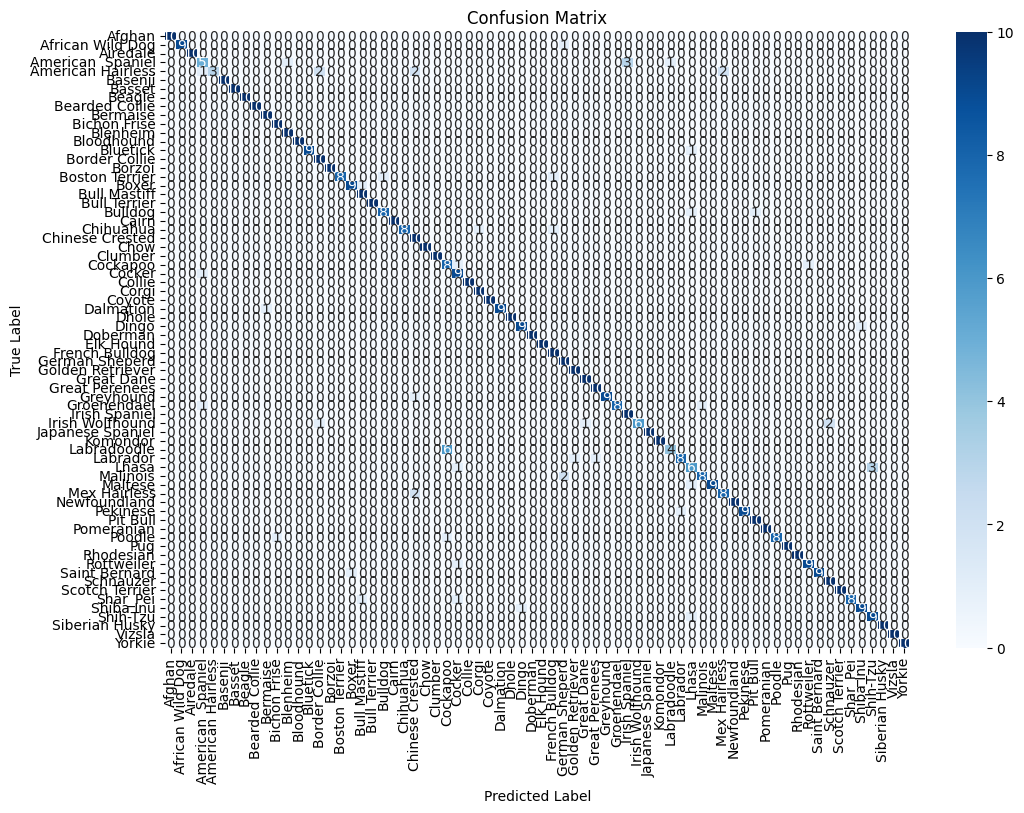

In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV containing predictions
csv_path = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\predictions_with_confidence.csv"
df = pd.read_csv(csv_path)

# Extract the true labels and predicted labels
true_labels = df['true_label']
predicted_labels = df['predicted_label']

# Calculate the accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision, recall, and F1-score (averaged for multi-class)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

# Print detailed classification report
class_report = classification_report(true_labels, predicted_labels, output_dict=True)
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

# Save metrics to CSV
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_df.to_csv("evaluation_metrics.csv", index=False)

# Save classification report to CSV
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df.to_csv("classification_report.csv", index=True)

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Save the plot as a JPG image
plt.savefig("confusion_matrix.jpg", format='jpg', dpi=300)
plt.show()



6. evaluasi model yang fokus pada penilaian klasifikasi multikelas menggunakan ROC Curve dan AUC, yang merupakan alat yang berguna untuk memahami seberapa baik model menangani berbagai kelas dalam tugas klasifikasi.

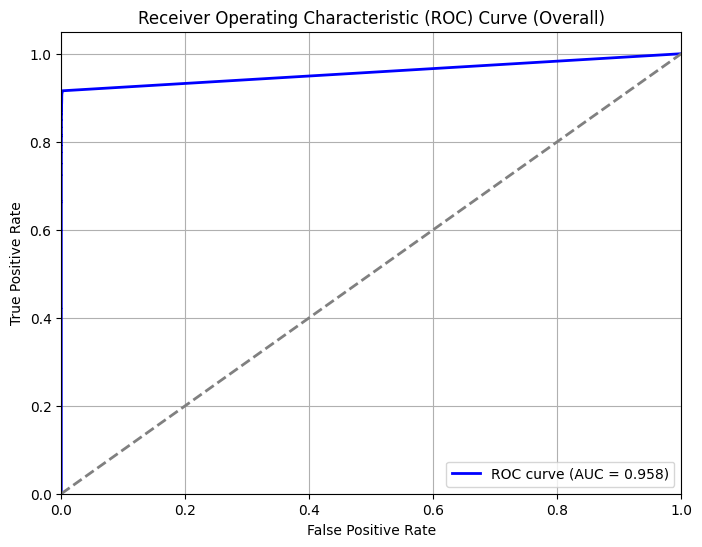

In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load the CSV containing predictions
csv_path = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\predictions_with_confidence.csv"
df = pd.read_csv(csv_path)

# Extract the true labels, predicted labels, and confidence scores
true_labels = df['true_label']
predicted_labels = df['predicted_label']
confidence_scores = df['confidence_score (%)'] / 100  # Normalize to [0, 1]

# Get the unique classes
class_labels = np.unique(true_labels)  # Unique class labels
n_classes = len(class_labels)  # Number of classes

# Map class labels to integer indices
class_to_index = {label: idx for idx, label in enumerate(class_labels)}

# Convert true labels to binary format (one-hot encoding)
true_labels_bin = label_binarize(true_labels, classes=class_labels)

# Create a matrix for predicted probabilities (initialize with zeros)
predicted_probs = np.zeros((len(df), n_classes))

# Loop over the data and fill in the predicted probabilities
for i in range(len(df)):
    predicted_class = predicted_labels.iloc[i]
    predicted_class_idx = class_to_index[predicted_class]  # Get the integer index for the predicted class
    predicted_probs[i, predicted_class_idx] = confidence_scores.iloc[i]  # Set the confidence score

# Compute the ROC curve for each class and calculate the AUC
fpr, tpr, _ = roc_curve(true_labels_bin.ravel(), predicted_probs.ravel())
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for the overall performance
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')

# Plot diagonal line for random classifier (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Overall)')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()


B. PROSES TESTING 

1. proses prediksi pada data testing (isinya tentu berbeda dengan training & validation) menggunakan model klasifikasi yang sudah dilatih dan penyimpanan hasil prediksi beserta skor kepercayaan dalam format CSV. Data yg dipakai berbeda karena Tujuan utama dari data test adalah untuk menilai kinerja model setelah dilatih menggunakan data pelatihan (training data). 

In [23]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model  # Import the load_model function
import random

# Load the trained model
model = load_model("dogclassification.h5")  # Replace with the correct path to your model file

# Directory containing test images with subdirectories for each class
test_dir = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\test"
predictions = []
true_labels = []
all_images = []
confidence_scores = []

# Define class names
class_names = {
    "0": "Afghan", "1": "African Wild Dog", "2": "Airedale", "3": "American Hairless", "4": "American  Spaniel",
    "5": "Basenji", "6": "Basset", "7": "Beagle", "8": "Bearded Collie", "9": "Bermaise", "10": "Bichon Frise",
    "11": "Blenheim", "12": "Bloodhound", "13": "Bluetick", "14": "Border Collie", "15": "Borzoi", "16": "Boston Terrier",
    "17": "Boxer", "18": "Bull Mastiff", "19": "Bull Terrier", "20": "Bulldog", "21": "Cairn", "22": "Chihuahua",
    "23": "Chinese Crested", "24": "Chow", "25": "Clumber", "26": "Cockapoo", "27": "Cocker", "28": "Collie", "29": "Corgi",
    "30": "Coyote", "31": "Dalmation", "32": "Dhole", "33": "Dingo", "34": "Doberman", "35": "Elk Hound", "36": "French Bulldog",
    "37": "German Sheperd", "38": "Golden Retriever", "39": "Great Dane", "40": "Great Perenees", "41": "Greyhound", 
    "42": "Groenendael", "43": "Irish Spaniel", "44": "Irish Wolfhound", "45": "Japanese Spaniel", "46": "Komondor", 
    "47": "Labradoodle", "48": "Labrador", "49": "Lhasa", "50": "Malinois", "51": "Maltese", "52": "Mex Hairless", 
    "53": "Newfoundland", "54": "Pekinese", "55": "Pit Bull", "56": "Pomeranian", "57": "Poodle", "58": "Pug", 
    "59": "Rhodesian", "60": "Rottweiler", "61": "Saint Bernard", "62": "Schnauzer", "63": "Scotch Terrier", 
    "64": "Shar_Pei", "65": "Shiba Inu", "66": "Shih-Tzu", "67": "Siberian Husky", "68": "Vizsla", "69": "Yorkie"
}

# Get the class directories
class_dirs = [os.path.join(test_dir, class_name) for class_name in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, class_name))]

# Prepare the list of image paths and corresponding class labels
image_paths = []
class_labels = []

for class_index, class_dir in enumerate(class_dirs):
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        image_paths.append(img_path)
        class_labels.append(class_index)

# Predictions and confidence scores
for img_path, true_label in zip(image_paths, class_labels):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Using the model that is already trained
    pred = model.predict(img_array)
    
    # Get predicted label index and confidence score
    predicted_label_index = np.argmax(pred)
    confidence_score = pred[0][predicted_label_index] * 100  # Convert to percentage
    
    # Append results to lists
    predictions.append(predicted_label_index)
    confidence_scores.append(confidence_score)
    true_labels.append(true_label)
    all_images.append(img_path)

# Convert predictions, true labels, and confidence scores to arrays
predictions = np.array(predictions)
true_labels = np.array(true_labels)
confidence_scores = np.array(confidence_scores)

# Prepare data for CSV
data = {
    "image_path": all_images,
    "true_label": [list(class_names.values())[i] for i in true_labels],
    "predicted_label": [list(class_names.values())[i] for i in predictions],
    "confidence_score (%)": confidence_scores,  # Confidence percentage
}

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
output_csv_path = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\testing_with_confidence.csv"
df.to_csv(output_csv_path, index=False)
print(f"Predictions with confidence scores saved to {output_csv_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/ste

2. Hasil dari file CSV yg sudah dibuat

In [24]:
# Load the CSV file
csv_path = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\testing_with_confidence.csv"
df = pd.read_csv(csv_path)
df

,image_path,true_label,predicted_label,confidence_score (%)
0,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Afghan,Afghan,100.000000
1,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Afghan,Afghan,100.000000
2,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Afghan,Afghan,100.000000
3,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Afghan,Afghan,100.000000
4,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Afghan,Afghan,100.000000
...,...,...,...,...
695,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Yorkie,Yorkie,96.040308
696,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Yorkie,Yorkie,99.571276
697,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Yorkie,Yorkie,99.928826
698,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Yorkie,Yorkie,99.926955


3. Evaluasi kinerja model klasifikasi yang telah dilatih, dengan menggunakan data yang sudah diprediksi dan hasil yang benar (true labels)., yang mencakup perhitungan accuracy, precision, recall, F1-score, serta visualisasi confusion matrix untuk menganalisis hasil prediksi model dan menyimpannya dalam berbagai format untuk analisis lebih lanjut.

Accuracy: 0.9043
Precision (weighted): 0.9177
Recall (weighted): 0.9043
F1 Score (weighted): 0.8975

Classification Report:
                   precision    recall  f1-score   support

           Afghan       1.00      1.00      1.00        10
 African Wild Dog       1.00      1.00      1.00        10
         Airedale       1.00      0.90      0.95        10
American  Spaniel       1.00      0.50      0.67        10
American Hairless       0.75      0.30      0.43        10
          Basenji       0.77      1.00      0.87        10
           Basset       1.00      1.00      1.00        10
           Beagle       1.00      0.90      0.95        10
   Bearded Collie       1.00      0.90      0.95        10
         Bermaise       0.91      1.00      0.95        10
     Bichon Frise       1.00      1.00      1.00        10
         Blenheim       0.91      1.00      0.95        10
       Bloodhound       1.00      1.00      1.00        10
         Bluetick       1.00      1.00      1.00 

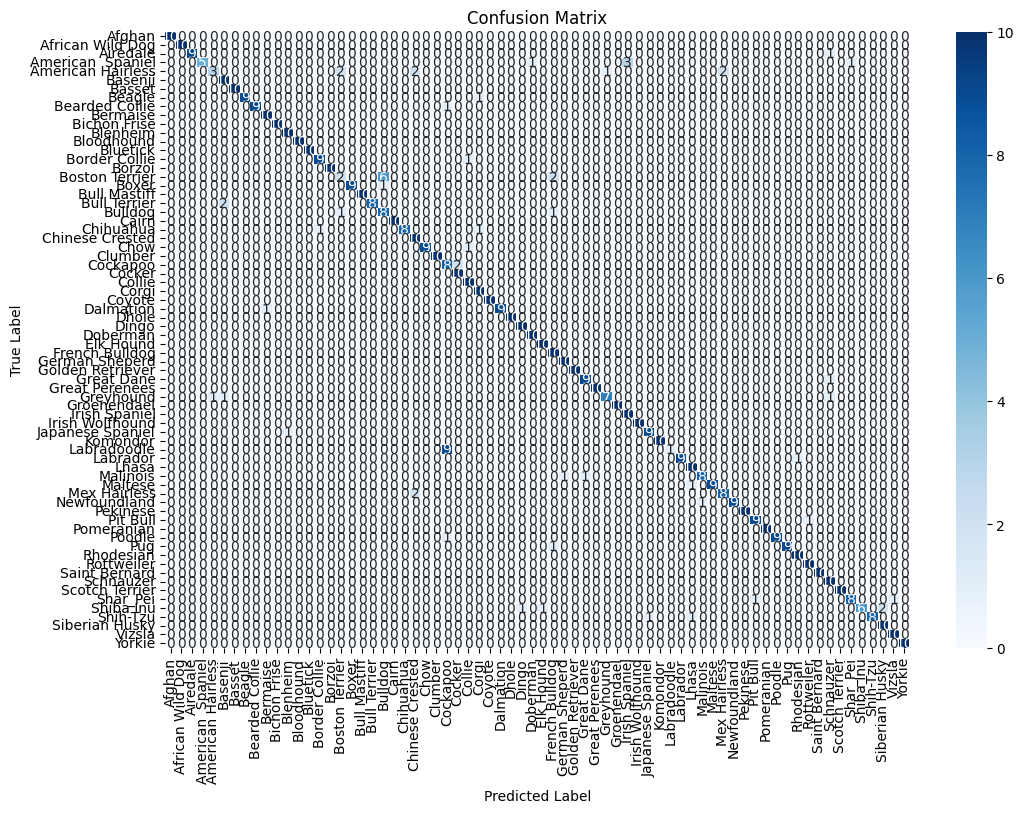

In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV containing predictions
csv_path = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\testing_with_confidence.csv"
df = pd.read_csv(csv_path)

# Extract the true labels and predicted labels
true_labels = df['true_label']
predicted_labels = df['predicted_label']

# Calculate the accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision, recall, and F1-score (averaged for multi-class)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

# Print detailed classification report
class_report = classification_report(true_labels, predicted_labels, output_dict=True)
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

# Save metrics to CSV
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_df.to_csv("evaluation_metrics.csv", index=False)

# Save classification report to CSV
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df.to_csv("classification_report.csv", index=True)

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Save the plot as a JPG image
plt.savefig("confusion_matrix.jpg", format='jpg', dpi=300)
plt.show()



4. proses evaluasi kinerja model klasifikasi multi-kelas menggunakan ROC curve, yang memberikan gambaran tentang seberapa baik model dapat memisahkan kelas-kelas yang benar dari yang salah. AUC yang lebih tinggi (mendekati 1) menunjukkan kinerja model yang lebih baik.

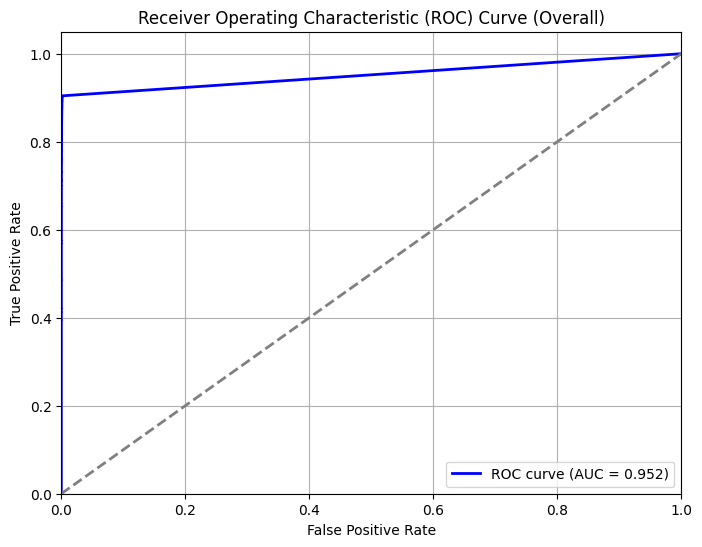

In [27]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load the CSV containing predictions
csv_path = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\testing_with_confidence.csv"
df = pd.read_csv(csv_path)

# Extract the true labels, predicted labels, and confidence scores
true_labels = df['true_label']
predicted_labels = df['predicted_label']
confidence_scores = df['confidence_score (%)'] / 100  # Normalize to [0, 1]

# Get the unique classes
class_labels = np.unique(true_labels)  # Unique class labels
n_classes = len(class_labels)  # Number of classes

# Map class labels to integer indices
class_to_index = {label: idx for idx, label in enumerate(class_labels)}

# Convert true labels to binary format (one-hot encoding)
true_labels_bin = label_binarize(true_labels, classes=class_labels)

# Create a matrix for predicted probabilities (initialize with zeros)
predicted_probs = np.zeros((len(df), n_classes))

# Loop over the data and fill in the predicted probabilities
for i in range(len(df)):
    predicted_class = predicted_labels.iloc[i]
    predicted_class_idx = class_to_index[predicted_class]  # Get the integer index for the predicted class
    predicted_probs[i, predicted_class_idx] = confidence_scores.iloc[i]  # Set the confidence score

# Compute the ROC curve for each class and calculate the AUC
fpr, tpr, _ = roc_curve(true_labels_bin.ravel(), predicted_probs.ravel())
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for the overall performance
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')

# Plot diagonal line for random classifier (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Overall)')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()


KESIMPULAN EVALUASI : aku taro di word ya